# Time Series Forecasting 

The purpose of this project is to **analyze time series data and make future predictions** using the **ARIMA model**. It will be applied especially to financial data such as stock prices.  

---

### Short Explanation of ARIMA  
**ARIMA** is a model that predicts the future by looking at past data.  
- **p**: Past values  
- **d**: Differencing to make data stationary  
- **q**: Past errors  

👉 In short, ARIMA uses the past values and errors of the data to forecast the future.  


[Time Series Forecasting with ARIMA](https://amanxai.com/2022/06/21/time-series-forecasting-with-arima/)

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

In [2]:
today = date.today()

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [4]:
df= yf.download('GOOG', start=start_date, end=end_date, progress=False)

C:\Users\asus\AppData\Local\Temp\ipykernel_18296\2976323651.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download('GOOG', start=start_date, end=end_date, progress=False)


In [5]:
df["Date"] = df.index

In [6]:
df = df[["Date", "Open", "High", "Low", "Close",  "Volume"]]

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.head()

Price,Date,Open,High,Low,Close,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2024-09-30,164.061939,166.630698,163.922550,166.461441,14070100
1,2024-10-01,168.124181,169.697298,165.177073,167.686096,18629500
2,2024-10-02,167.028953,168.144083,165.525539,166.580917,12745000
3,2024-10-03,165.097427,167.178316,164.649375,166.481369,11004300
4,2024-10-04,168.602070,168.811161,166.232451,167.825470,11422100


In [9]:
df.tail()

Price,Date,Open,High,Low,Close,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
245,2025-09-23,253.654999,254.770004,251.089996,252.339996,17521100
246,2025-09-24,252.149994,252.960007,247.220001,247.830002,16958500
247,2025-09-25,244.839996,247.315002,241.649994,246.570007,17379800
248,2025-09-26,247.785004,250.119995,246.639999,247.179993,16581700
249,2025-09-29,248.274994,251.648300,243.199997,244.360001,23042490


In [10]:
df.shape

(250, 6)

In [11]:
df.columns

MultiIndex([(  'Date',     ''),
            (  'Open', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            ( 'Close', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [12]:
df.columns = df.columns.get_level_values(0)

In [13]:
df.head()

Price,Date,Open,High,Low,Close,Volume
0,2024-09-30,164.061939,166.630698,163.922550,166.461441,14070100
1,2024-10-01,168.124181,169.697298,165.177073,167.686096,18629500
2,2024-10-02,167.028953,168.144083,165.525539,166.580917,12745000
3,2024-10-03,165.097427,167.178316,164.649375,166.481369,11004300
4,2024-10-04,168.602070,168.811161,166.232451,167.825470,11422100


In [14]:
df = df[["Date", "Close"]]

In [15]:
df.head()

Price,Date,Close
0,2024-09-30,166.461441
1,2024-10-01,167.686096
2,2024-10-02,166.580917
3,2024-10-03,166.481369
4,2024-10-04,167.825470


In [16]:
import matplotlib.pyplot as plt

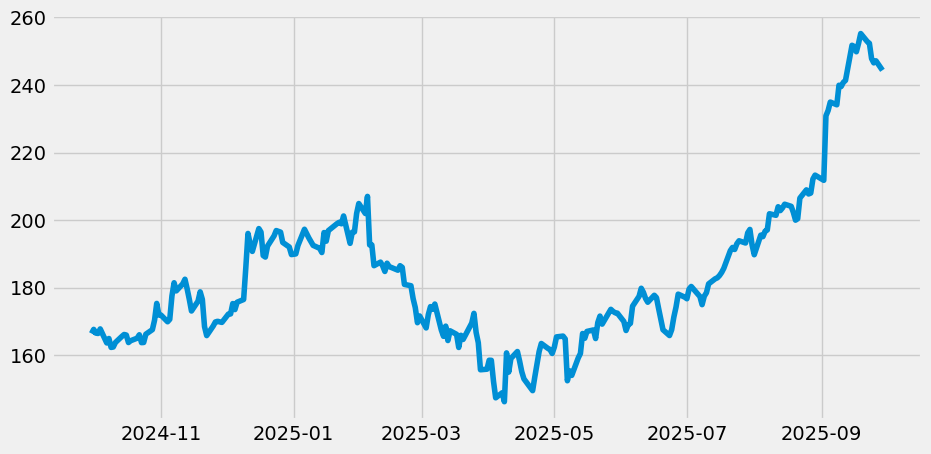

In [17]:
plt.style.use('fivethirtyeight') # Grafiğiin görünümü güzelleştirmek için kullanılır
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Close"]);

## Using ARIMA for Time Series Forecasting

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

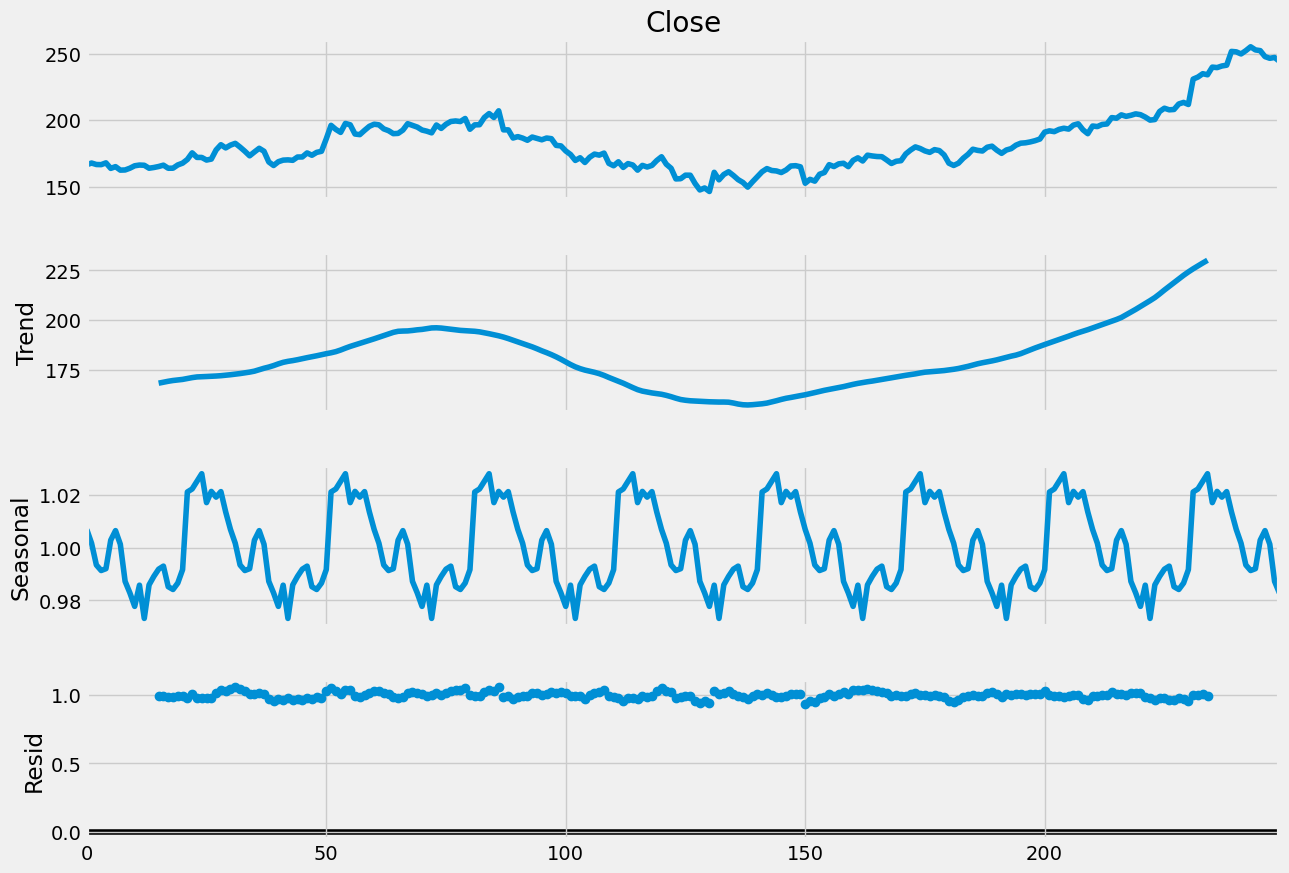

In [19]:
result = seasonal_decompose(df["Close"], model='multiplicative', period = 30)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10);

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

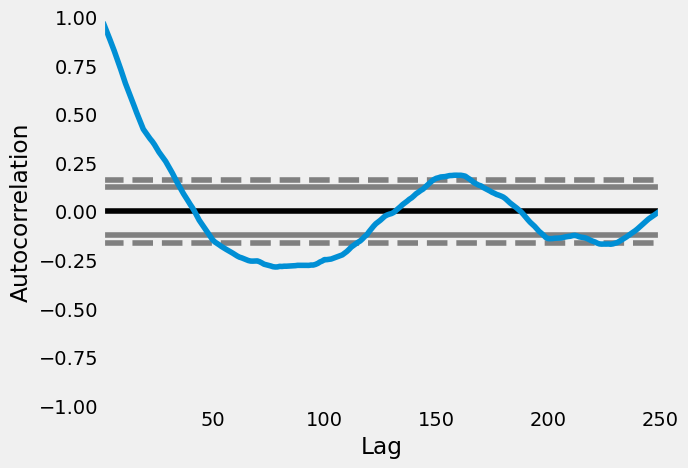

In [20]:
#  find the value of p 
pd.plotting.autocorrelation_plot(df["Close"])

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

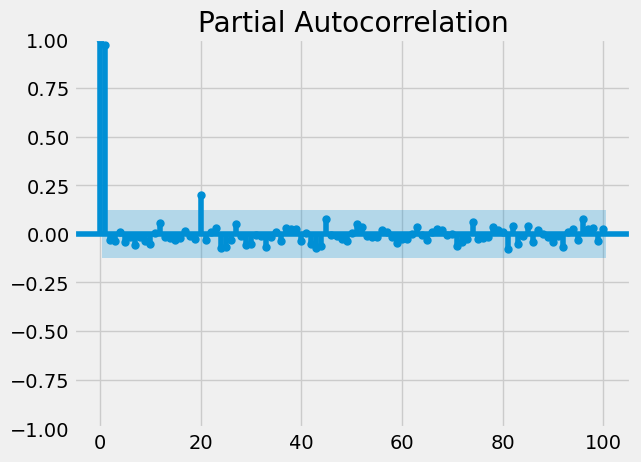

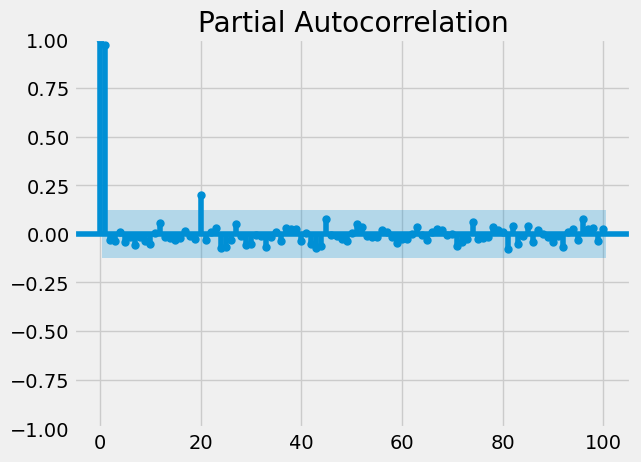

In [22]:
# find the value of q 
plot_pacf(df["Close"], lags = 100)

In [23]:
from statsmodels.tsa.arima.model import ARIMA  

p, d, q = 5, 1, 2
model = ARIMA(df["Close"], order=(p, d, q))
fitted = model.fit()            
print(fitted.summary())

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -671.003
Date:                Tue, 30 Sep 2025   AIC                           1358.006
Time:                        00:34:29   BIC                           1386.146
Sample:                             0   HQIC                          1369.333
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0014      0.112     -8.906      0.000      -1.222      -0.781
ar.L2         -0.8493      0.144     -5.896      0.000      -1.132      -0.567
ar.L3         -0.0173      0.132     -0.131      0.8

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      166.461442
2      167.687001
3      166.651543
4      166.314304
          ...    
245    253.365528
246    251.677136
247    247.544550
248    246.971982
249    247.328414
Name: predicted_mean, Length: 250, dtype: float64


In [25]:
#%pip uninstall -y statsmodels scipy
#%pip install --no-cache-dir --force-reinstall "statsmodels==0.14.2" "scipy==1.11.4" "numpy>=1.23,<2.0"

In [30]:
import statsmodels.api as sm   # Zaman serisi modelleri için statsmodels kütüphanesini içe aktar

# SARIMAX modelini tanımlıyoruz
model = sm.tsa.statespace.SARIMAX(
    df['Close'],               # Tahmin yapılacak zaman serisi verisi (ör: hisse senedi kapanış fiyatı)
    order=(p, d, q),           # ARIMA parametreleri: p=AR (autoregressive), d=differencing, q=MA (moving average)
    seasonal_order=(p, d, q, 12)  # Mevsimsel parametreler: (p,d,q,s) -> s=12 aylık mevsimsellik
)

In [31]:
res = model.fit()

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -656.003
Date:                            Tue, 30 Sep 2025   AIC                           1342.006
Time:                                    00:37:34   BIC                           1394.027
Sample:                                         0   HQIC                          1362.974
                                            - 250                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8953      0.753     -1.189      0.234      -2.371       0.580
ar.L2         -0.4558      0.858     -0.531      0.595      -2.137       1.226
ar.L3         -0.0351      0.120     -0.292      0.770      -0.271       0.200
ar.L4         -0.0910      0.111     -0.824      0.410      -0.308       0.126
ar.L5         -0.1000      0.084     -1.184      0.236      -0.266       0.066
ma.L1          0.8619      0.756      1.140      0.254      -0.620       2.344
ma.L2          0.4841      0.846      0.572      0.567      -1.174       2.143
ar.S.L12      -0.2995      1.147     -0.261      0.794      -2.547       1.948
ar.S.L24       0.1363      0.184      0.742      0.458      -0.224       0.496
ar.S.L36       0.1006      0.235      0.429      0.668      -0.359       0.561
ar.S.L48       0.0281      0.156      0.180      0.857      -0.278       0.334
ar.S.L60      -0.0609      0.111     -0.546      0.585      -0.279       0.158
ma.S.L12      -0.6641      1.332     -0.499      0.618      -3.275       1.947
ma.S.L24      -0.3164      1.289     -0.245      0.806      -2.843       2.210
sigma2        13.0762     10.741      1.217      0.223      -7.976      34.128
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               155.10
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.30
Prob(H) (two-sided):                  0.82   Kurtosis:                         6.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
predictions = res.predict(start=len(df), end=len(df)+9)  

In [37]:
print(predictions)

250    245.614591
251    247.323978
252    248.138047
253    247.861137
254    247.948363
255    251.516291
256    251.806766
257    251.559918
258    250.583390
259    251.854994
Name: predicted_mean, dtype: float64


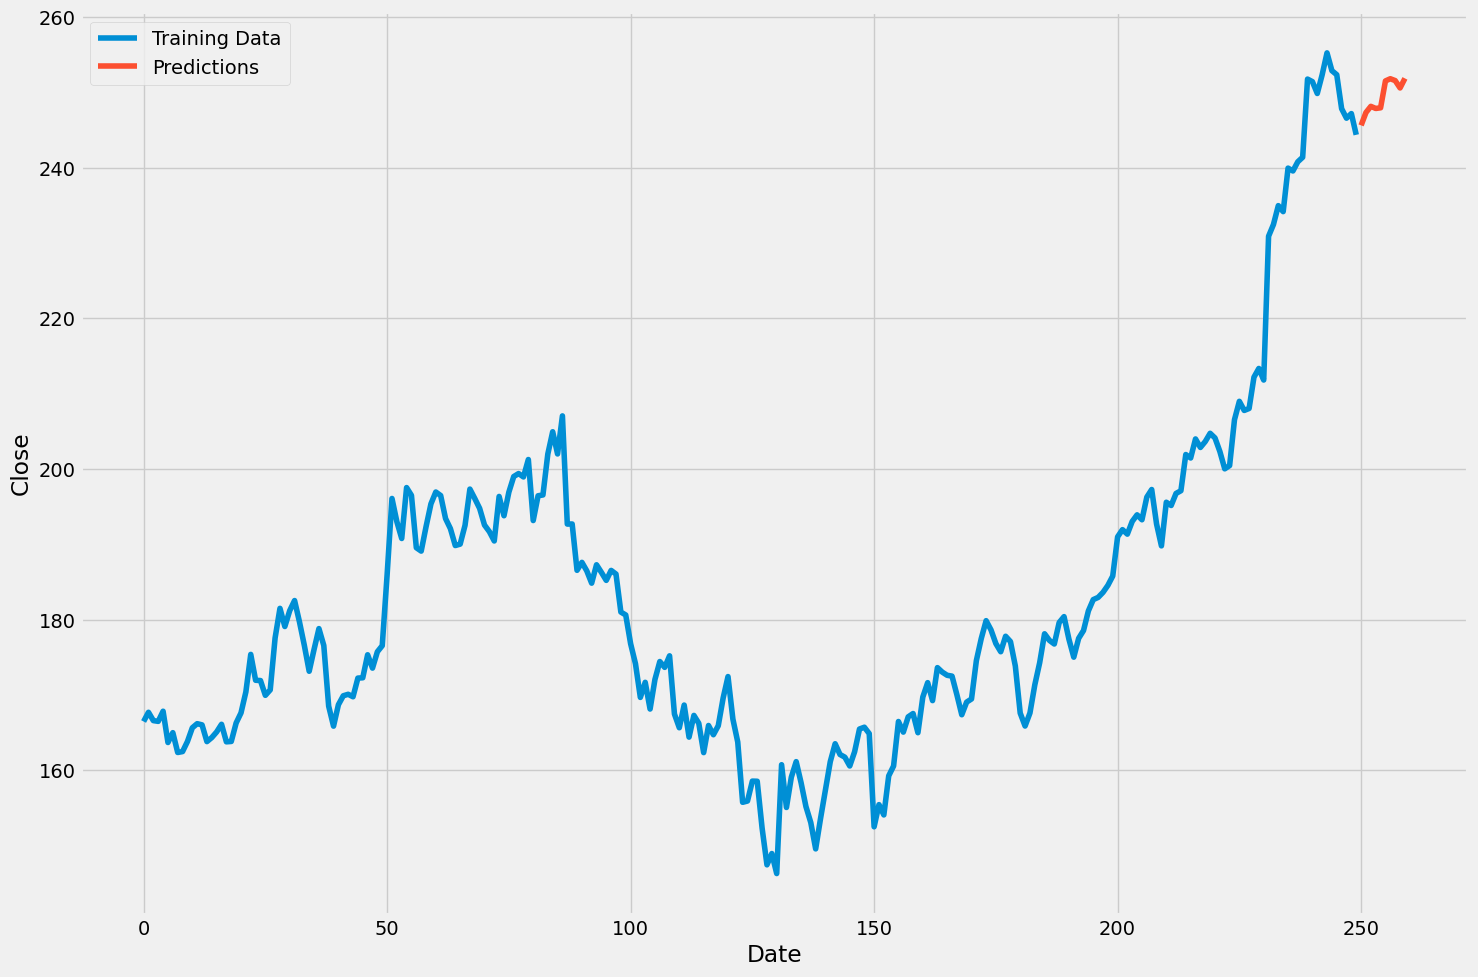

In [39]:
import matplotlib.pyplot as plt

ax = df["Close"].plot(figsize=(15, 10), label="Training Data")
predictions.plot(ax=ax, label="Predictions")          

plt.legend()
plt.xlabel("Date")
plt.ylabel("Close")
plt.tight_layout()
plt.show()

## Conclusion
ARIMA and SARIMA models are powerful tools for time series forecasting. While ARIMA is applied to stationary data, SARIMA also accounts for seasonal effects. These methods provide future predictions based on past data and play an important role in supporting decision-making processes.